In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#load data and preview the first 5 rows
df = pd.read_csv("mall_customer_analysis/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Check the datatypes to make sure they are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#Check for missing data
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#Get the summary statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


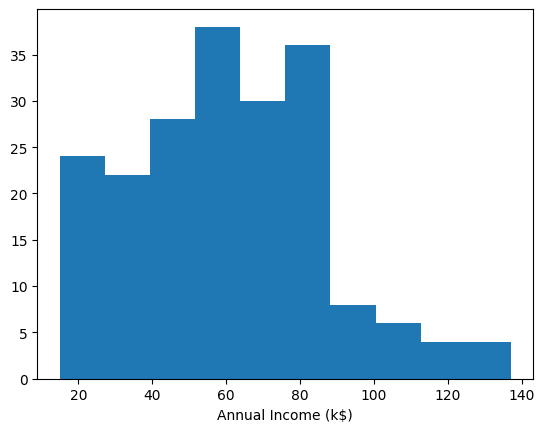

In [15]:
#Show the distribution of income
df["Annual Income (k$)"].hist()
plt.grid(visible=False)
plt.xlabel("Annual Income (k$)")
plt.show()

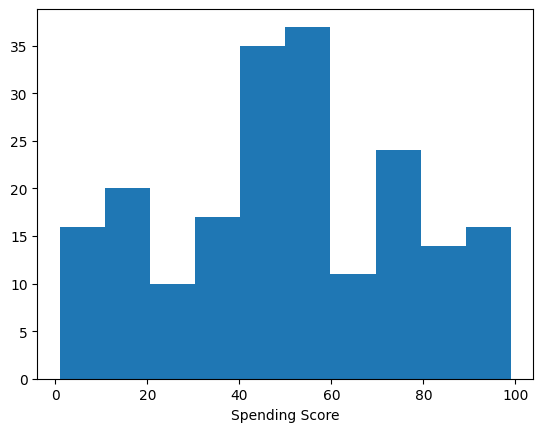

In [16]:
#Show the distribution of spending score
df["Spending Score (1-100)"].hist()
plt.grid(visible=False)
plt.xlabel("Spending Score")
plt.show()

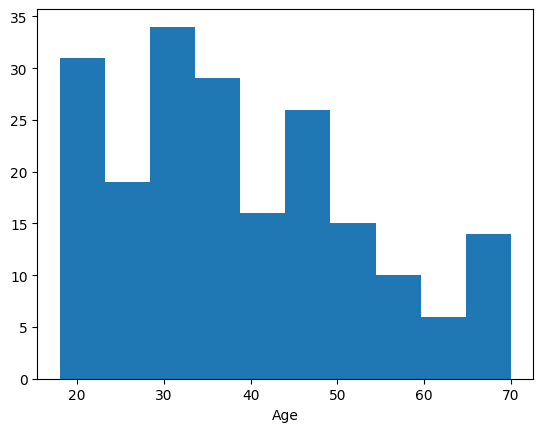

In [20]:
#Show the distribution of age
df["Age"].hist()
plt.grid(visible=False)
plt.xlabel("Age")
plt.show()

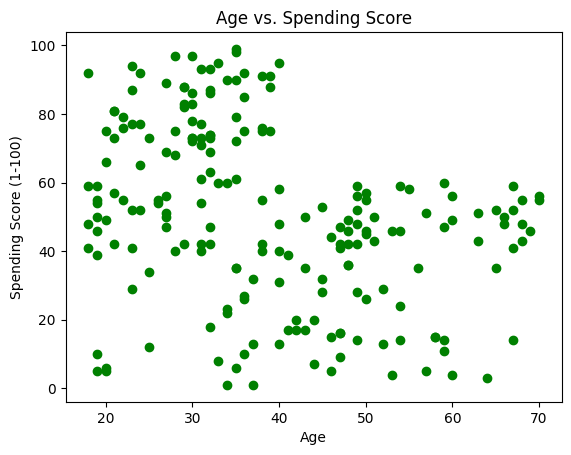

In [21]:
# Correlation between Age and Spending Score
plt.scatter(df['Age'], df['Spending Score (1-100)'], color='green')
plt.title('Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [22]:
# Correlation Analysis
age_spending_corr = df['Age'].corr(df['Spending Score (1-100)'])
print(f"Correlation between Age and Spending Score: {age_spending_corr}")

Correlation between Age and Spending Score: -0.32722684603909014


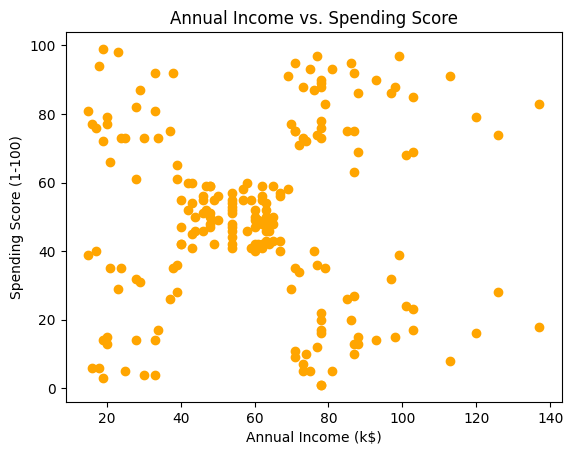

In [23]:
# Scatter plot of Income vs. Spending Score
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='orange')
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [24]:
# Correlation Analysis
income_spending_corr = df['Annual Income (k$)'].corr(df['Spending Score (1-100)'])
print(f"Correlation between Income and Spending Score: {income_spending_corr}")

Correlation between Income and Spending Score: 0.009902848094037608


C:\Users\Kevin\AppData\Local\Temp\ipykernel_22788\3152912344.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending = df.groupby('Age Group')['Spending Score (1-100)'].mean()


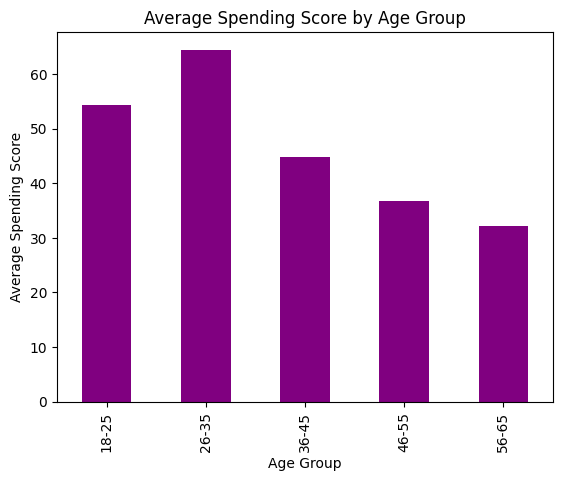

In [25]:
# Define Age Groups
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Average Spending Score per Age Group
age_group_spending = df.groupby('Age Group')['Spending Score (1-100)'].mean()
age_group_spending.plot(kind='bar', color='purple')
plt.title('Average Spending Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending Score')
plt.show()


        Annual Income (k$)  Spending Score (1-100)
Gender                                            
Female           59.250000               51.526786
Male             62.227273               48.511364


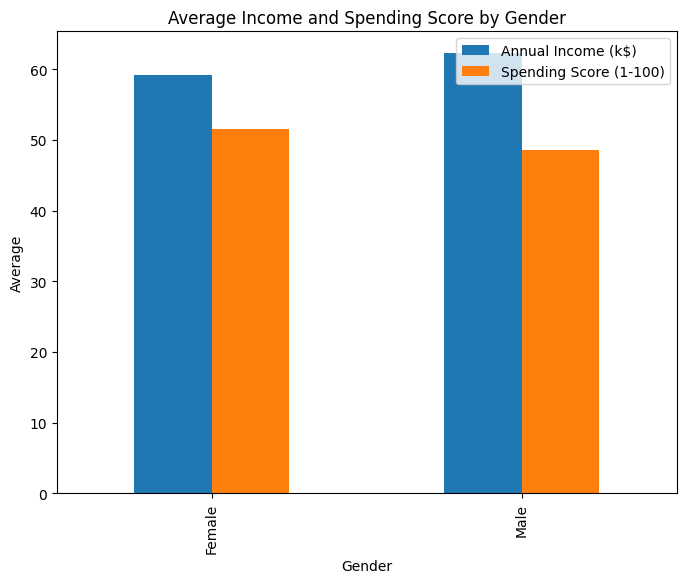

In [26]:
# Average Income and Spending by Gender
gender_income_spending = df.groupby('Gender')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(gender_income_spending)

# Bar plot of Average Income and Spending by Gender
gender_income_spending.plot(kind='bar', figsize=(8,6))
plt.title('Average Income and Spending Score by Gender')
plt.ylabel('Average')
plt.show()


             Age  Annual Income (k$)  Spending Score (1-100)
count  43.000000           43.000000               43.000000
mean   30.325581           66.093023               85.744186
std     6.077754           32.271773                7.534344
min    18.000000           15.000000               75.000000
25%    25.500000           33.000000               78.500000
50%    30.000000           76.000000               87.000000
75%    35.000000           86.500000               92.000000
max    40.000000          137.000000               99.000000


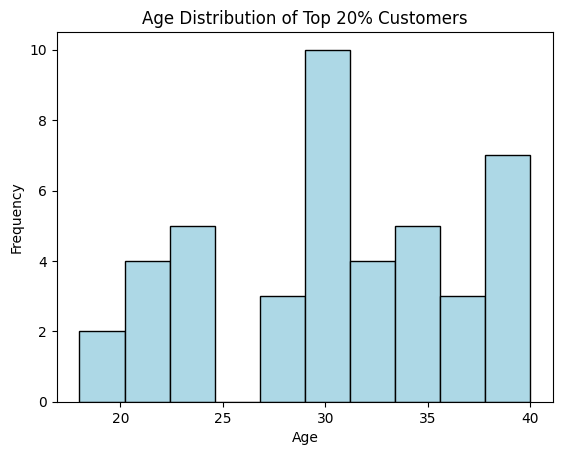

In [27]:
# Define Top 20% by Spending Score
top_20_percent = df['Spending Score (1-100)'].quantile(0.80)

# Filter for Top 20% Customers
top_customers = df[df['Spending Score (1-100)'] >= top_20_percent]

# Analyze Top Customers
print(top_customers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']].describe())

# Visualize Age Distribution of Top Customers
plt.hist(top_customers['Age'], bins=10, color='lightblue', edgecolor='black')
plt.title('Age Distribution of Top 20% Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


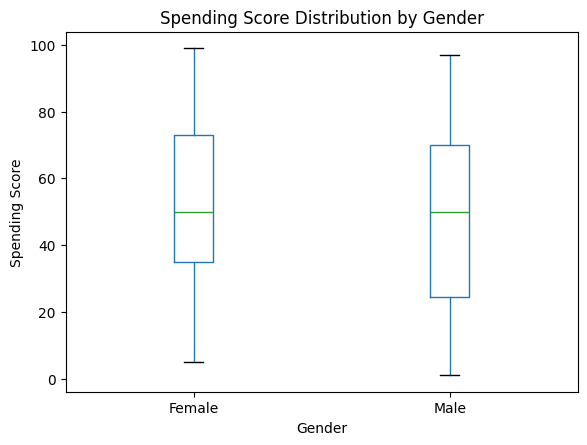

In [28]:
# Boxplot for Spending Score by Gender
df.boxplot(column='Spending Score (1-100)', by='Gender', grid=False)
plt.title('Spending Score Distribution by Gender')
plt.suptitle('')
plt.ylabel('Spending Score')
plt.show()


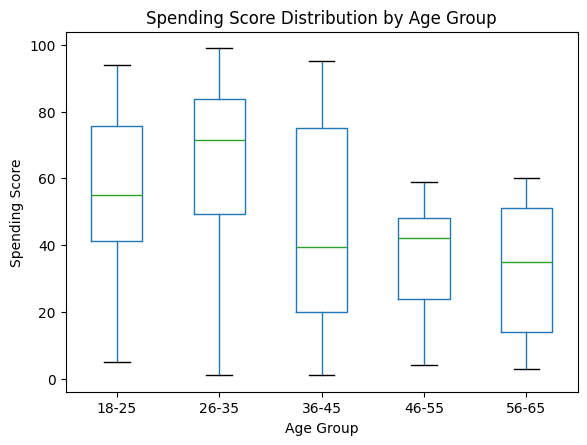

In [29]:
# Boxplot for Spending Score by Age Group
df.boxplot(column='Spending Score (1-100)', by='Age Group', grid=False)
plt.title('Spending Score Distribution by Age Group')
plt.suptitle('')
plt.ylabel('Spending Score')
plt.show()
